In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chisquare
from isochrones.mist import MIST_Isochrone
from isochrones.mist import MISTModelGrid

%matplotlib inline

## Loading Pileadeas Data 

In [12]:
V, BV = np.loadtxt('pld.txt', usecols = (2, 3), skiprows=2, unpack = True)

## MIST Testing

In [52]:
MISTModelGrid.phot_systems

('CFHT',
 'DECam',
 'GALEX',
 'JWST',
 'LSST',
 'PanSTARRS',
 'SDSS',
 'SPITZER',
 'SkyMapper',
 'UBVRIplus',
 'UKIDSS',
 'WISE')

In [51]:
MISTModelGrid.phot_bands

{'UBVRIplus': ['Bessell_U',
  'Bessell_B',
  'Bessell_V',
  'Bessell_R',
  'Bessell_I',
  '2MASS_J',
  '2MASS_H',
  '2MASS_Ks',
  'Kepler_Kp',
  'Kepler_D51',
  'Hipparcos_Hp',
  'Tycho_B',
  'Tycho_V',
  'Gaia_G'],
 'WISE': ['WISE_W1', 'WISE_W2', 'WISE_W3', 'WISE_W4'],
 'CFHT': ['CFHT_u', 'CFHT_g', 'CFHT_r', 'CFHT_i_new', 'CFHT_i_old', 'CFHT_z'],
 'DECam': ['DECam_u', 'DECam_g', 'DECam_r', 'DECam_i', 'DECam_z', 'DECam_Y'],
 'GALEX': ['GALEX_FUV', 'GALEX_NUV'],
 'JWST': ['F070W',
  'F090W',
  'F115W',
  'F140M',
  'F150W2',
  'F150W',
  'F162M',
  'F164N',
  'F182M',
  'F187N',
  'F200W',
  'F210M',
  'F212N',
  'F250M',
  'F277W',
  'F300M',
  'F322W2',
  'F323N',
  'F335M',
  'F356W',
  'F360M',
  'F405N',
  'F410M',
  'F430M',
  'F444W',
  'F460M',
  'F466N',
  'F470N',
  'F480M'],
 'LSST': ['LSST_u', 'LSST_g', 'LSST_r', 'LSST_i', 'LSST_z', 'LSST_y'],
 'PanSTARRS': ['PS_g', 'PS_r', 'PS_i', 'PS_z', 'PS_y', 'PS_w', 'PS_open'],
 'SkyMapper': ['SkyMapper_u',
  'SkyMapper_v',
  'SkyMappe

In [53]:
MISTModelGrid.get_band('B')

('UBVRIplus', 'Bessell_B')

In [77]:
iso = MIST_Isochrone(bands=['B','V'])
print(iso)

dm = 5.880456295278407


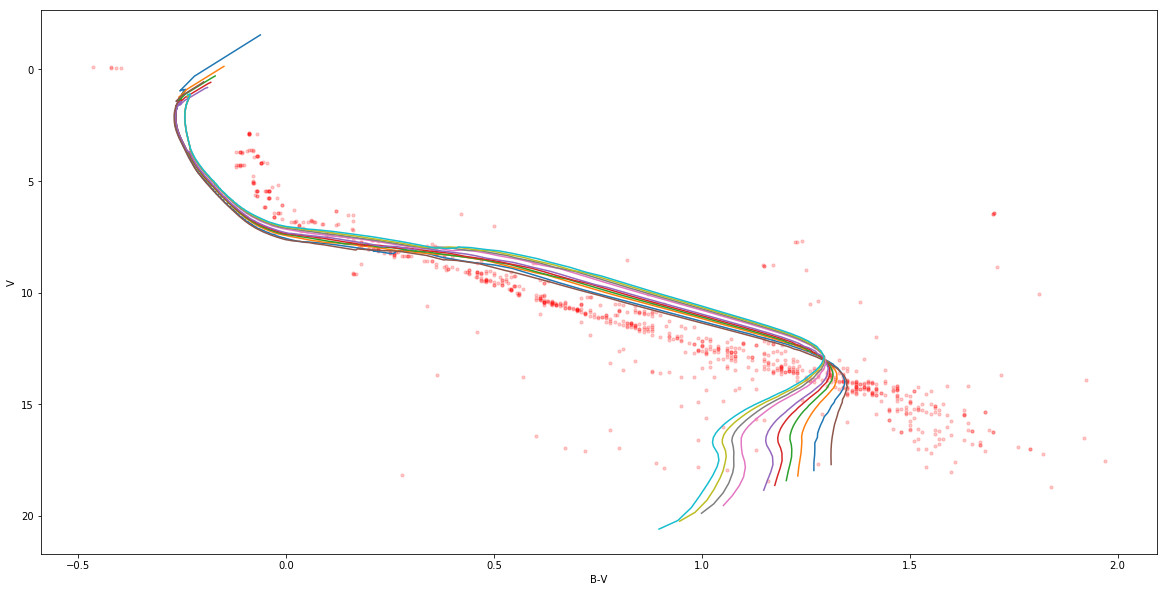

In [91]:
fig, axis = plt.subplots(figsize=(20,10))

for age in np.arange(7, 8, 0.1):
    for fe in np.arange(0, 0.5, 0.05):
        isochrone = iso.isochrone(age, fe)
        BVmodel = isochrone['B_mag'] - isochrone['V_mag']
        Vmodel = isochrone['V_mag']

        distance = 150
        distance_modulus = 5*np.log10(distance/10)
        # print ('dm = {}'.format(distance_modulus))

        Vmodel = Vmodel + distance_modulus

        # chi_value = chisquare(dice['observed'], dice['expected'])

        axis.plot(BVmodel, Vmodel)


    axis.invert_yaxis()


    axis.scatter(BV, V, color = 'red', s = 10, alpha=0.2)
    axis.set_xlabel('B-V')
    axis.set_ylabel('V')
    plt.show()